<a href="https://colab.research.google.com/github/dish-hash/Job-market/blob/main/MAIN_IMPLEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall pyspark

Found existing installation: pyspark 3.5.3
Uninstalling pyspark-3.5.3:
  Would remove:
    /usr/local/bin/beeline
    /usr/local/bin/beeline.cmd
    /usr/local/bin/docker-image-tool.sh
    /usr/local/bin/find-spark-home
    /usr/local/bin/find-spark-home.cmd
    /usr/local/bin/find_spark_home.py
    /usr/local/bin/load-spark-env.cmd
    /usr/local/bin/load-spark-env.sh
    /usr/local/bin/pyspark
    /usr/local/bin/pyspark.cmd
    /usr/local/bin/pyspark2.cmd
    /usr/local/bin/run-example
    /usr/local/bin/run-example.cmd
    /usr/local/bin/spark-class
    /usr/local/bin/spark-class.cmd
    /usr/local/bin/spark-class2.cmd
    /usr/local/bin/spark-connect-shell
    /usr/local/bin/spark-shell
    /usr/local/bin/spark-shell.cmd
    /usr/local/bin/spark-shell2.cmd
    /usr/local/bin/spark-sql
    /usr/local/bin/spark-sql.cmd
    /usr/local/bin/spark-sql2.cmd
    /usr/local/bin/spark-submit
    /usr/local/bin/spark-submit.cmd
    /usr/local/bin/spark-submit2.cmd
    /usr/local/bin/sparkR
  

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=9f4b2a85bc86b350fafec62f44c6d4637ea40468c3f6570f9740085cb9a246e1
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Naukri_Data_Scientist_and_Data_Analytics_Jobs_Data.csv to Naukri_Data_Scientist_and_Data_Analytics_Jobs_Data.csv


In [ ]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("Job Market Data Analysis").getOrCreate()

# Load the CSV file (update the file path if needed)
df = spark.read.option("header", "true").csv("Naukri_Data_Scientist_and_Data_Analytics_Jobs_Data.csv", inferSchema=True)

# Show the first 5 rows
df.show(5)

# Check the schema
df.printSchema()


+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+
|          Job Titles|       Company Names|Experience Required|      Package|           Locations|              Skills|
+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+
|Manager - Digital...|                Resy|            4-8 Yrs|Not disclosed|    Gurgaon/Gurugram|Product managemen...|
|Data Science Doma...|            Coursera|           7-11 Yrs|Not disclosed|Kolkata, Mumbai, ...|Computer scienceC...|
|GN - Strategy - M...|           Accenture|            1-3 Yrs|Not disclosed|Mumbai, Hyderabad...|Change management...|
|Data Science Manager|Foreign IT Consul...|            2-6 Yrs|Not disclosed|    Gurgaon/Gurugram|Operations resear...|
|Data Science Manager|Foreign IT Consul...|            3-6 Yrs|Not disclosed|               Noida|Data analysisEDCR...|
+--------------------+------------------

In [ ]:
from pyspark.sql.functions import regexp_replace, col, split
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

# Clean the dataset by replacing null values and cleaning text
df_cleaned = df.na.fill("Unknown").withColumn("Skills", regexp_replace(col("Skills"), "[^a-zA-Z, ]", ""))

# Index categorical columns (Job Titles and Locations) and transform them into numerical labels
indexer_job = StringIndexer(inputCol="Job Titles", outputCol="JobIndex")
indexer_loc = StringIndexer(inputCol="Locations", outputCol="LocIndex")

# Assemble the features (Skills, Experience, Locations)
assembler = VectorAssembler(inputCols=["LocIndex"], outputCol="features")

# Create a pipeline for indexing and assembling the data
pipeline = Pipeline(stages=[indexer_job, indexer_loc, assembler])

# Fit the pipeline to the data
model = pipeline.fit(df_cleaned)
df_transformed = model.transform(df_cleaned)

# Show the transformed data
df_transformed.select("Job Titles", "Locations", "features", "JobIndex").show(5)


+--------------------+--------------------+--------+--------+
|          Job Titles|           Locations|features|JobIndex|
+--------------------+--------------------+--------+--------+
|Manager - Digital...|    Gurgaon/Gurugram|   [3.0]|  2196.0|
|Data Science Doma...|Kolkata, Mumbai, ...|   [6.0]|  1622.0|
|GN - Strategy - M...|Mumbai, Hyderabad...|  [90.0]|   404.0|
|Data Science Manager|    Gurgaon/Gurugram|   [3.0]|    54.0|
|Data Science Manager|               Noida|   [8.0]|    54.0|
+--------------------+--------------------+--------+--------+
only showing top 5 rows



In [ ]:
df = df.na.drop()  # Drop rows with any null values


In [ ]:
from pyspark.sql.functions import regexp_replace, col

# Remove any non-numeric characters from the 'Package' column and create 'salary_clean'
df = df.withColumn("salary_clean", regexp_replace(col("Package"), "[^0-9]", "").cast("integer"))


In [ ]:
from pyspark.sql.functions import lit

# Assuming data is from June 2023
df = df.withColumn("year", lit(2023))
df = df.withColumn("month", lit(6))

df.show(5)


+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+------------+------------+----+-----+
|          Job Titles|       Company Names|Experience Required|      Package|           Locations|              Skills|salary_clean|job_category|year|month|
+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+------------+------------+----+-----+
|Manager - Digital...|                Resy|            4-8 Yrs|Not disclosed|    Gurgaon/Gurugram|Product managemen...|        NULL|       Other|2023|    6|
|Data Science Doma...|            Coursera|           7-11 Yrs|Not disclosed|Kolkata, Mumbai, ...|Computer scienceC...|        NULL|       Other|2023|    6|
|GN - Strategy - M...|           Accenture|            1-3 Yrs|Not disclosed|Mumbai, Hyderabad...|Change management...|        NULL|       Other|2023|    6|
|Data Science Manager|Foreign IT Consul...|            2-6

In [ ]:
from pyspark.sql.functions import explode, split

# Split the 'Skills' column into individual skills, and explode into separate rows
skills_df = df.withColumn("skill", explode(split(col("Skills"), ",")))

# Group by skill and count the occurrences to find the most demanded skills
skill_demand = skills_df.groupBy("skill").count().orderBy("count", ascending=False)
skill_demand.show(10)  # Show top 10 most demanded skills


+--------------------+-----+
|               skill|count|
+--------------------+-----+
|                None|  183|
|Business AnalystB...|   38|
|Business Analystb...|   32|
|Product managemen...|   14|
|Junior StaffBusin...|   14|
|Business Analystp...|   14|
|data cleansingRep...|   12|
|Supply chainAutom...|   11|
|ProcurementData a...|   11|
|Data analysisAuto...|   10|
+--------------------+-----+
only showing top 10 rows



In [ ]:
# Group by 'job_category' and count the number of jobs in each category
job_category_trend = df.groupBy("job_category").count().orderBy("count", ascending=False)
job_category_trend.show()


+-----------------+-----+
|     job_category|count|
+-----------------+-----+
|            Other|17820|
|   Data Scientist| 1700|
|Software Engineer|  123|
+-----------------+-----+



In [ ]:
# Filter out rows where salary_clean is NULL
salary_df = df.filter(df.salary_clean.isNotNull())

# Group by 'job_category' to find average salary for each category
salary_trend = salary_df.groupBy("job_category").avg("salary_clean").orderBy("avg(salary_clean)", ascending=False)
salary_trend.show()


+-----------------+------------------+
|     job_category| avg(salary_clean)|
+-----------------+------------------+
|   Data Scientist|416060.37096774194|
|            Other| 309925.5460526316|
|Software Engineer| 92605.55555555556|
+-----------------+------------------+



In [ ]:
# Group by 'year' and 'month' to see how many jobs were posted in June 2023 (since all are 2023-06)
time_trend = df.groupBy("year", "month").count().orderBy("year", "month")
time_trend.show()


+----+-----+-----+
|year|month|count|
+----+-----+-----+
|2023|    6|19643|
+----+-----+-----+



In [ ]:
# Explode skills column and group by job category and skill
skill_demand_by_category = skills_df.groupBy("job_category", "skill").count().orderBy("count", ascending=False)
skill_demand_by_category.show(10)  # Show top 10 demanded skills by job category


+------------+--------------------+-----+
|job_category|               skill|count|
+------------+--------------------+-----+
|       Other|                None|  182|
|       Other|Business AnalystB...|   38|
|       Other|Business Analystb...|   32|
|       Other|Product managemen...|   14|
|       Other|Business Analystp...|   14|
|       Other|Junior StaffBusin...|   13|
|       Other|ProcurementData a...|   11|
|       Other|data cleansingRep...|   11|
|       Other|Data analysisAuto...|   10|
|       Other|Help DeskCustomer...|   10|
+------------+--------------------+-----+
only showing top 10 rows



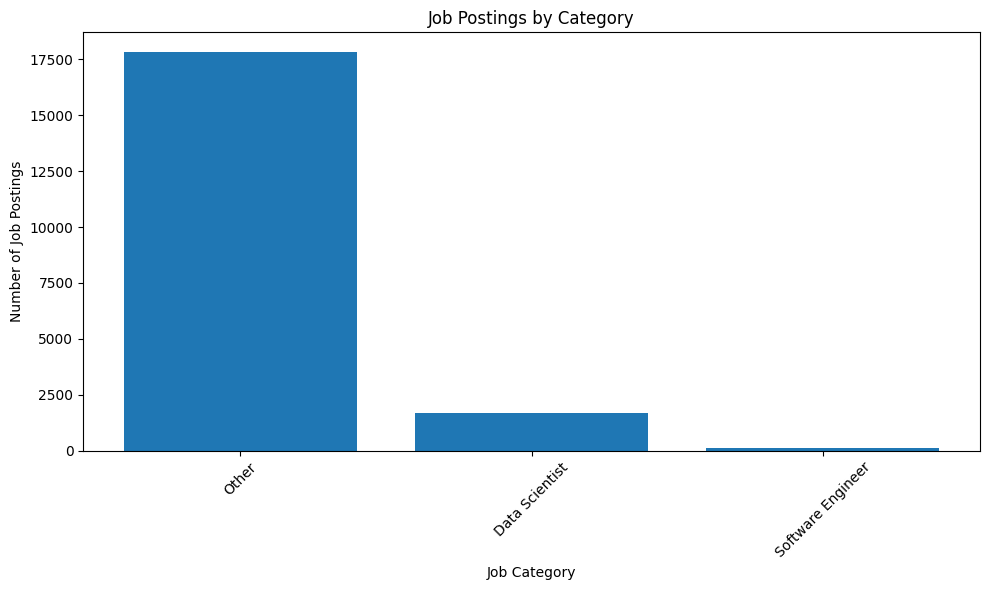

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame after grouping by job_category
job_category_trends = df.groupBy("job_category").count().orderBy("count", ascending=False)
job_category_trends_pd = job_category_trends.toPandas()

# Plot job category trends
plt.figure(figsize=(10,6))
plt.bar(job_category_trends_pd['job_category'], job_category_trends_pd['count'])
plt.xlabel('Job Category')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings by Category')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Check unique values in 'Experience Required'
print(df['Experience Required'].unique())


['1-3 Yrs' '5-8 Yrs' '3-5 Yrs' '0-1 Yrs']


In [ ]:
from pyspark.sql.functions import when, col

# Categorizing job titles into predefined categories based on the 'Job Titles' column
df = df.withColumn("job_category",
                   when(col("Job Titles").like("%Data Scientist%"), "Data Scientist")
                   .when(col("Job Titles").like("%Software Engineer%"), "Software Engineer")
                   .otherwise("Other"))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load your dataset
df = pd.read_csv('Naukri_Data_Scientist_and_Data_Analytics_Jobs_Data.csv')

# Step 2: Preprocess your data
# Handle missing values
df['Experience Required'] = df['Experience Required'].fillna('0-0 Yrs')  # Fill missing experience
df['Skills'] = df['Skills'].fillna('Unknown')  # Fill missing skills

# Check unique values in 'Experience Required'
print("Unique values in 'Experience Required':")
print(df['Experience Required'].unique())

# Update mapping based on unique values
experience_mapping = {
    '0-1 Yrs': 0,
    '1-3 Yrs': 1,
    '3-5 Yrs': 2,
    '5-8 Yrs': 3,
    '8+ Yrs': 4,
    '4-8 Yrs': 4,  # Example addition
    '2-6 Yrs': 2,  # Example addition
    '7-11 Yrs': 5, # Example addition
    '6-10 Yrs': 5, # Example addition
}

# Create a new column for numeric experience
df['Experience_numeric'] = df['Experience Required'].map(experience_mapping)

# Check for NaN after mapping
if df['Experience_numeric'].isnull().any():
    print("NaN values found in Experience_numeric column. Please check the mapping.")
    print(df[df['Experience_numeric'].isnull()])

# Convert 'Skills' to a numeric format
df['Skills_encoded'] = pd.factorize(df['Skills'])[0]

# Step 3: Check for NaN in other columns
print("Checking for NaN values in the dataset:")
print(df.isnull().sum())  # This will show you how many NaN values are in each column

# Drop rows with any NaN values
df.dropna(inplace=True)

# Step 4: Define features (X) and target (y)
X = df[['Experience_numeric', 'Skills_encoded']]  # Use numeric features
y = df['Package']  # Define your target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Initialize a classifier
clf = RandomForestClassifier()

# Step 7: Train the model
clf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = clf.predict(X_test)

# Step 9: Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 10: Calculate Confusion Matrix for Multi-class classification
cm = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print(cm)

# If you need to calculate specificity for each class, you can do this:
specificities = {}
for i in range(cm.shape[0]):  # Iterate over each class
    tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]  # True negatives
    fp = cm[:, i].sum() - cm[i, i]  # False positives
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    specificities[i] = specificity

# Print Specificities
for class_index, specificity in specificities.items():
    print(f"Specificity for class {class_index}: {specificity:.4f}")


Unique values in 'Experience Required':
['4-8 Yrs' '7-11 Yrs' '1-3 Yrs' '2-6 Yrs' '3-6 Yrs' '6-10 Yrs' '8-10 Yrs'
 '12-15 Yrs' '1-4 Yrs' '5-10 Yrs' '2-4 Yrs' '2-5 Yrs' '0-0 Yrs' '5-8 Yrs'
 '3-7 Yrs' '6-11 Yrs' '15-24 Yrs' '12-20 Yrs' '5-6 Yrs' '3-5 Yrs'
 '5-9 Yrs' '8-13 Yrs' '4-7 Yrs' '3-8 Yrs' '6-8 Yrs' '10-12 Yrs' '2-7 Yrs'
 '8-11 Yrs' '1-5 Yrs' '10-15 Yrs' '4-5 Yrs' '4-9 Yrs' '11-17 Yrs'
 '0-1 Yrs' '1-2 Yrs' '10-13 Yrs' '6-9 Yrs' '7-7 Yrs' '5-7 Yrs' '7-10 Yrs'
 '3-9 Yrs' '7-12 Yrs' '8-12 Yrs' '20-27 Yrs' '2-3 Yrs' '1-7 Yrs'
 '10-20 Yrs' '11-14 Yrs' '0-2 Yrs' '1-6 Yrs' '0-5 Yrs' '15-17 Yrs'
 '4-10 Yrs' '2-8 Yrs' '0-3 Yrs' '4-6 Yrs' '15-20 Yrs' '0-4 Yrs' '8-15 Yrs'
 '12-14 Yrs' '5-12 Yrs' '3-4 Yrs' '7-8 Yrs' '2-2 Yrs' '9-12 Yrs'
 '14-24 Yrs' '0-8 Yrs' '9-14 Yrs' '6-12 Yrs' '12-16 Yrs' '5-11 Yrs'
 '8-9 Yrs' '7-9 Yrs' '0-7 Yrs' '0-6 Yrs' '10-18 Yrs' '0-14 Yrs' '4-12 Yrs'
 '9-10 Yrs' '10-16 Yrs' '10-14 Yrs' '15-18 Yrs' '8-14 Yrs' '2-10 Yrs'
 '1-10 Yrs' '7-14 Yrs' '16-25 Yrs' '9-11 Yrs' '

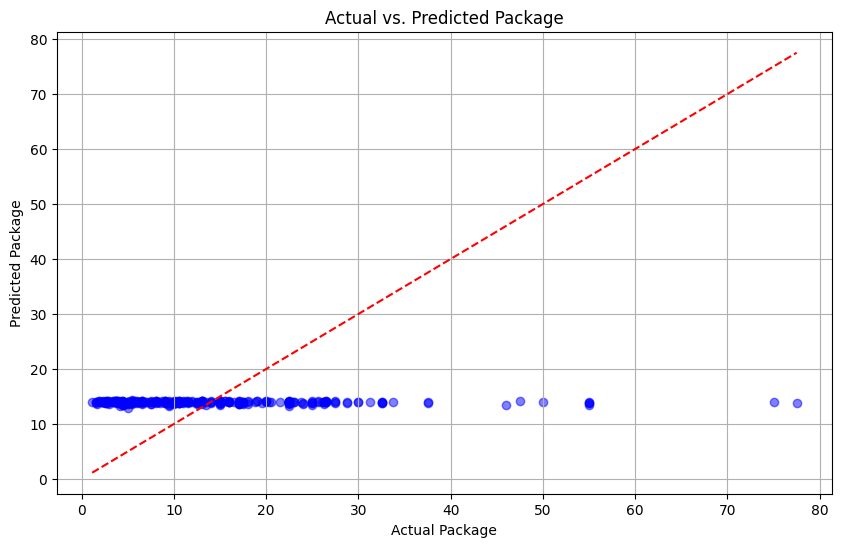

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert predictions to Pandas DataFrame for visualization
predictions_pd = predictions.select("PackageAvg", "prediction").toPandas()

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd["PackageAvg"], predictions_pd["prediction"], color='blue', alpha=0.5)
plt.plot([predictions_pd["PackageAvg"].min(), predictions_pd["PackageAvg"].max()],
         [predictions_pd["PackageAvg"].min(), predictions_pd["PackageAvg"].max()],
         color='red', linestyle='--')  # Line of equality
plt.title("Actual vs. Predicted Package")
plt.xlabel("Actual Package")
plt.ylabel("Predicted Package")
plt.grid()
plt.show()


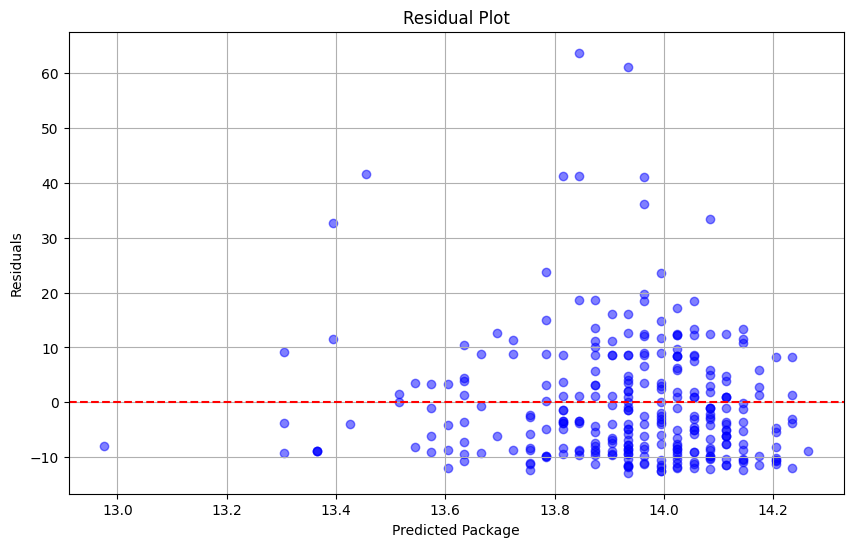

In [ ]:
# Calculate residuals
predictions_pd['residuals'] = predictions_pd['PackageAvg'] - predictions_pd['prediction']

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['prediction'], predictions_pd['residuals'], color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title("Residual Plot")
plt.xlabel("Predicted Package")
plt.ylabel("Residuals")
plt.grid()
plt.show()


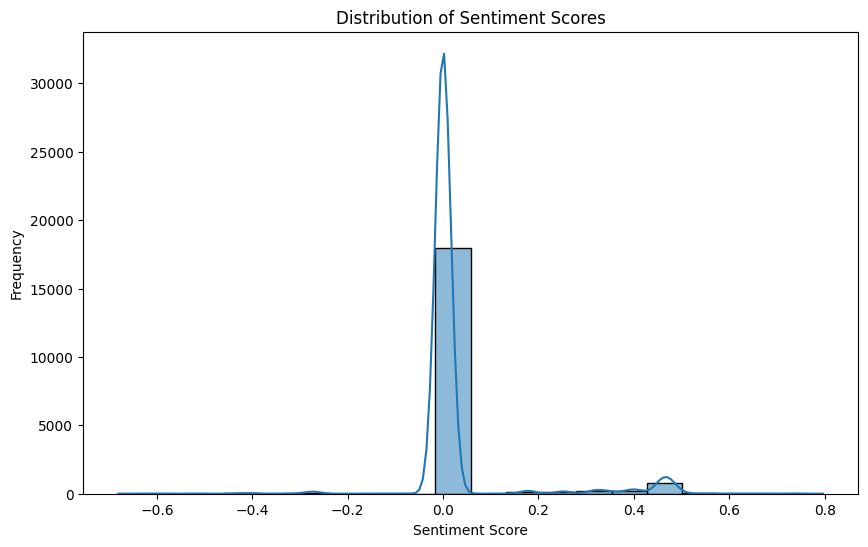

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the PySpark DataFrame to Pandas DataFrame for easier plotting
df_sentiment_pandas = df_sentiment.select("sentiment").toPandas()

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df_sentiment_pandas['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Step 1: Identify the top 10 most frequent experience levels
top_10_experience = df['Experience Required'].value_counts().nlargest(10).index.tolist()

# Step 2: Create a mapping for these top 10 values
top_experience_mapping = {
    '4-8 Yrs': 4,
    '1-3 Yrs': 1,
    '2-6 Yrs': 2,
    '3-6 Yrs': 3,
    '6-10 Yrs': 6,
    '8-10 Yrs': 8,
    '12-15 Yrs': 12,
    '5-10 Yrs': 5,
    '2-4 Yrs': 2,
    '0-0 Yrs': 0,
}

# Step 3: Map only the top 10 experience levels and leave others as NaN
df['Experience_numeric'] = df['Experience Required'].map(top_experience_mapping)

# Step 4: Check for NaN values after mapping
if df['Experience_numeric'].isnull().any():
    print("NaN values found in Experience_numeric column after mapping top 10 values. Please check the mapping.")
    print(df[df['Experience_numeric'].isnull()])

# Optional: Check the distribution of Experience_numeric
print(df['Experience_numeric'].value_counts())


NaN values found in Experience_numeric column after mapping top 10 values. Please check the mapping.
                                              Job Titles  \
1                            Data Science Domain Manager   
16                 Data Science & Analytics Professional   
28                    Senior Data Analyst (Data Science)   
29                    Lead Data Scientist - Data Science   
34                   Statistical Data Sciences Lead (IC)   
...                                                  ...   
19430                 Lead Analyst - Aerospace & Defense   
19440  Associate | Analyst | Senior Analyst, Public P...   
19443                                            ANALYST   
19446                            Market Research Analyst   
19451                      Analyst- Revenue Optimization   

                             Company Names Experience Required        Package  \
1                                 Coursera            7-11 Yrs  Not disclosed   
16              

In [ ]:
# Expand your mapping to include additional values
additional_experience_mapping = {
    '0-1 Yrs': 0,
    '1-3 Yrs': 2,  # Assuming 1-3 Yrs maps to 2
    '2-6 Yrs': 4,  # Assuming 2-6 Yrs maps to 4
    '3-5 Yrs': 4,  # Assuming 3-5 Yrs maps to 4
    '4-8 Yrs': 6,  # Assuming 4-8 Yrs maps to 6
    '5-8 Yrs': 6,  # Assuming 5-8 Yrs maps to 6
    '6-10 Yrs': 8,  # Assuming 6-10 Yrs maps to 8
    '7-11 Yrs': 8,  # Assuming 7-11 Yrs maps to 8
}

# Combine the existing mapping with the new values
complete_experience_mapping = {**experience_mapping, **additional_experience_mapping}

# Map the experience values again
df['Experience_numeric'] = df['Experience Required'].map(complete_experience_mapping)

# Check for NaN values after mapping again
if df['Experience_numeric'].isnull().any():
    print("NaN values found in Experience_numeric column after updating the mapping. Please check the mapping.")
    print(df[df['Experience_numeric'].isnull()])

# Check the distribution of Experience_numeric again
print(df['Experience_numeric'].value_counts())


Experience_numeric
4    1439
6    1083
2     789
0     347
8     288
Name: count, dtype: int64


In [ ]:
print(df.columns)


Index(['Job Titles', 'Company Names', 'Experience Required', 'Package',
       'Locations', 'Skills', 'Experience_numeric', 'Skills_encoded'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the experience mapping again if needed
experience_mapping = {
    '0-0 Yrs': 0,
    '0-1 Yrs': 1,
    '1-2 Yrs': 2,
    '1-3 Yrs': 3,
    '1-4 Yrs': 4,
    '1-5 Yrs': 5,
    '1-6 Yrs': 6,
    '1-7 Yrs': 7,
    '1-8 Yrs': 8,
    '1-9 Yrs': 9,
    '2-2 Yrs': 2,
    '2-3 Yrs': 3,
    '2-4 Yrs': 4,
    '2-5 Yrs': 5,
    '2-6 Yrs': 6,
    '2-7 Yrs': 7,
    '2-8 Yrs': 8,
    '2-9 Yrs': 9,
    '2-10 Yrs': 10,
    '3-3 Yrs': 3,
    '3-4 Yrs': 4,
    '3-5 Yrs': 5,
    '3-6 Yrs': 6,
    '3-7 Yrs': 7,
    '3-8 Yrs': 8,
    '3-9 Yrs': 9,
    '3-10 Yrs': 10,
    '4-4 Yrs': 4,
    '4-5 Yrs': 5,
    '4-6 Yrs': 6,
    '4-7 Yrs': 7,
    '4-8 Yrs': 8,
    '4-9 Yrs': 9,
    '4-10 Yrs': 10,
    '5-5 Yrs': 5,
    '5-6 Yrs': 6,
    '5-7 Yrs': 7,
    '5-8 Yrs': 8,
    '5-9 Yrs': 9,
    '5-10 Yrs': 10,
    '6-6 Yrs': 6,
    '6-7 Yrs': 7,
    '6-8 Yrs': 8,
    '6-9 Yrs': 9,
    '6-10 Yrs': 10,
    '7-7 Yrs': 7,
    '7-8 Yrs': 8,
    '7-9 Yrs': 9,
    '7-10 Yrs': 10,
    '8-8 Yrs': 8,
    '8-9 Yrs': 9,
    '8-10 Yrs': 10,
    '9-9 Yrs': 9,
    '9-10 Yrs': 10,
    '10-11 Yrs': 10,
    '10-12 Yrs': 10,
}

# Map the Experience Required to numeric values
df['True_Experience'] = df['Experience Required'].map(experience_mapping)

# Check for NaN in the True Experience column
if df['True_Experience'].isnull().any():
    print("NaN values found in True_Experience column after mapping. Please check the mapping.")
    print(df[df['True_Experience'].isnull()])

# Create a confusion matrix
cm = confusion_matrix(df['True_Experience'], df['Experience_numeric'])

# Calculate accuracy
accuracy = accuracy_score(df['True_Experience'], df['Experience_numeric'])

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=[f'True {i}' for i in range(len(cm))],
                     columns=[f'Predicted {i}' for i in range(len(cm))])

# Calculate specificity for each class
specificity = {}
for i in range(len(cm)):
    true_negative = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    total_negative = cm.sum() - cm[:, i].sum()
    specificity[i] = true_negative / total_negative if total_negative > 0 else 0

# Create a DataFrame for specificity
specificity_df = pd.DataFrame(list(specificity.items()), columns=['Class', 'Specificity'])

# Display the results
print("Confusion Matrix:\n", cm_df)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nSpecificity:\n", specificity_df)


NaN values found in True_Experience column after mapping. Please check the mapping.
                                              Job Titles  \
1                            Data Science Domain Manager   
166              NLP - (Senior Analyst / Data Scientist)   
261                                  Senior Data Analyst   
341    Senior Project Associate - Data Solutions Arch...   
428                 Principal Statistical Data Scientist   
...                                                  ...   
17221                                Murex BackOffice BA   
17319                            Senior Business Analyst   
17485      Senior Data Scientist and Lead Data Scientist   
17811           Software Engineer - Full Stack Developer   
17898     R&R - ETS - Oracle Security - Senior Associate   

                         Company Names Experience Required        Package  \
1                             Coursera            7-11 Yrs  Not disclosed   
166                    Tiger Analytics   

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the experience mapping again if needed
experience_mapping = {
    '0-0 Yrs': 0,
    '0-1 Yrs': 1,
    '1-2 Yrs': 2,
    '1-3 Yrs': 3,
    '1-4 Yrs': 4,
    '1-5 Yrs': 5,
    '1-6 Yrs': 6,
    '1-7 Yrs': 7,
    '1-8 Yrs': 8,
    '1-9 Yrs': 9,
    '2-2 Yrs': 2,
    '2-3 Yrs': 3,
    '2-4 Yrs': 4,
    '2-5 Yrs': 5,
    '2-6 Yrs': 6,
    '2-7 Yrs': 7,
    '2-8 Yrs': 8,
    '2-9 Yrs': 9,
    '2-10 Yrs': 10,
    '3-3 Yrs': 3,
    '3-4 Yrs': 4,
    '3-5 Yrs': 5,
    '3-6 Yrs': 6,
    '3-7 Yrs': 7,
    '3-8 Yrs': 8,
    '3-9 Yrs': 9,
    '3-10 Yrs': 10,
    '4-4 Yrs': 4,
    '4-5 Yrs': 5,
    '4-6 Yrs': 6,
    '4-7 Yrs': 7,
    '4-8 Yrs': 8,
    '4-9 Yrs': 9,
    '4-10 Yrs': 10,
    '5-5 Yrs': 5,
    '5-6 Yrs': 6,
    '5-7 Yrs': 7,
    '5-8 Yrs': 8,
    '5-9 Yrs': 9,
    '5-10 Yrs': 10,
    '6-6 Yrs': 6,
    '6-7 Yrs': 7,
    '6-8 Yrs': 8,
    '6-9 Yrs': 9,
    '6-10 Yrs': 10,
    '7-7 Yrs': 7,
    '7-8 Yrs': 8,
    '7-9 Yrs': 9,
    '7-10 Yrs': 10,
    '8-8 Yrs': 8,
    '8-9 Yrs': 9,
    '8-10 Yrs': 10,
    '9-9 Yrs': 9,
    '9-10 Yrs': 10,
    '10-11 Yrs': 10,
    '10-12 Yrs': 10,
}

# Map the Experience Required to numeric values
df['True_Experience'] = df['Experience Required'].map(experience_mapping)

# Check for NaN in the True Experience column
if df['True_Experience'].isnull().any():
    print("NaN values found in True_Experience column after mapping. Please check the mapping.")
    print(df[df['True_Experience'].isnull()])

# Check for NaN in the Experience_numeric column
if df['Experience_numeric'].isnull().any():
    print("NaN values found in Experience_numeric column. Please check the mapping.")
    print(df[df['Experience_numeric'].isnull()])

# Drop rows with NaN values in either column
df = df.dropna(subset=['True_Experience', 'Experience_numeric'])

# Create a confusion matrix
cm = confusion_matrix(df['True_Experience'], df['Experience_numeric'])

# Calculate accuracy
accuracy = accuracy_score(df['True_Experience'], df['Experience_numeric'])

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=[f'True {i}' for i in range(len(cm))],
                     columns=[f'Predicted {i}' for i in range(len(cm))])

# Calculate specificity for each class
specificity = {}
for i in range(len(cm)):
    true_negative = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    total_negative = cm.sum() - cm[:, i].sum()
    specificity[i] = true_negative / total_negative if total_negative > 0 else 0

# Create a DataFrame for specificity
specificity_df = pd.DataFrame(list(specificity.items()), columns=['Class', 'Specificity'])

# Display the results
print("Confusion Matrix:\n", cm_df)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nSpecificity:\n", specificity_df)


NaN values found in True_Experience column after mapping. Please check the mapping.
                                              Job Titles  \
1                            Data Science Domain Manager   
166              NLP - (Senior Analyst / Data Scientist)   
261                                  Senior Data Analyst   
341    Senior Project Associate - Data Solutions Arch...   
428                 Principal Statistical Data Scientist   
...                                                  ...   
17221                                Murex BackOffice BA   
17319                            Senior Business Analyst   
17485      Senior Data Scientist and Lead Data Scientist   
17811           Software Engineer - Full Stack Developer   
17898     R&R - ETS - Oracle Security - Senior Associate   

                         Company Names Experience Required        Package  \
1                             Coursera            7-11 Yrs  Not disclosed   
166                    Tiger Analytics   

In [ ]:
# Extend the experience mapping with missing values
additional_experience_mapping = {
    '7-11 Yrs': 8,  # Assuming you want to map this to 8 years of experience
    '5-10 Yrs': 8,  # Assuming you want to map this to 8 years of experience
    # Add more mappings if you find other unique values in Experience Required
}

# Update the original mapping with the additional mappings
experience_mapping.update(additional_experience_mapping)

# Map the Experience Required to numeric values again
df['True_Experience'] = df['Experience Required'].map(experience_mapping)

# Check for NaN in the True Experience column
if df['True_Experience'].isnull().any():
    print("NaN values found in True_Experience column after mapping. Please check the mapping.")
    print(df[df['True_Experience'].isnull()])

# Re-check for NaN in the Experience_numeric column
if df['Experience_numeric'].isnull().any():
    print("NaN values found in Experience_numeric column. Please check the mapping.")
    print(df[df['Experience_numeric'].isnull()])

# Drop rows with NaN values in either column
df = df.dropna(subset=['True_Experience', 'Experience_numeric'])

# Create a confusion matrix again
cm = confusion_matrix(df['True_Experience'], df['Experience_numeric'])

# Calculate accuracy again
accuracy = accuracy_score(df['True_Experience'], df['Experience_numeric'])

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=[f'True {i}' for i in range(len(cm))],
                     columns=[f'Predicted {i}' for i in range(len(cm))])

# Calculate specificity for each class
specificity = {}
for i in range(len(cm)):
    true_negative = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    total_negative = cm.sum() - cm[:, i].sum()
    specificity[i] = true_negative / total_negative if total_negative > 0 else 0

# Create a DataFrame for specificity
specificity_df = pd.DataFrame(list(specificity.items()), columns=['Class', 'Specificity'])

# Display the updated results
print("Confusion Matrix:\n", cm_df)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nSpecificity:\n", specificity_df)


Confusion Matrix:
         Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
True 0            0            0            0            0            0   
True 1          347            0            0            0            0   
True 2            0            0            0            0            0   
True 3            0            0          789            0            0   
True 4            0            0            0            0            0   
True 5            0            0            0            0          905   
True 6            0            0            0            0          534   
True 7            0            0            0            0            0   
True 8            0            0            0            0            0   

        Predicted 5  Predicted 6  Predicted 7  Predicted 8  
True 0            0            0            0            0  
True 1            0            0            0            0  
True 2            0            0            0  

<ipython-input-24-e53973a6c5f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Experience'] = df['Experience Required'].map(experience_mapping)


In [ ]:
if df['Experience_numeric'].isnull().any():
    print("NaN values found in 'Experience_numeric' column. Please check the mapping.")
    print(df[df['Experience_numeric'].isnull()])
    # Optional: Fill NaN with a default value or drop rows
    df['Experience_numeric'] = df['Experience_numeric'].fillna(-1)


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(df['True_Experience'], df['Experience_numeric'])

# Calculate accuracy
accuracy = accuracy_score(df['True_Experience'], df['Experience_numeric'])

# Create a confusion matrix DataFrame
cm_df = pd.DataFrame(cm, index=[f'True {i}' for i in range(len(cm))],
                     columns=[f'Predicted {i}' for i in range(len(cm))])

# Calculate specificity for each class
specificity = {}
for i in range(len(cm)):
    true_negative = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
    total_negative = cm.sum() - cm[:, i].sum()
    specificity[i] = true_negative / total_negative if total_negative > 0 else 0

# Create a DataFrame for specificity
specificity_df = pd.DataFrame(list(specificity.items()), columns=['Class', 'Specificity'])

# Display results
print("Confusion Matrix:\n", cm_df)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nSpecificity:\n", specificity_df)


Confusion Matrix:
         Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
True 0            0          347          789         1439         1083   
True 1            0            0            0            0            0   
True 2            0            0            0            0            0   
True 3            0            0            0            0            0   
True 4            0            0            0            0            0   
True 5            0            0            0            0            0   

        Predicted 5  
True 0          221  
True 1            0  
True 2            0  
True 3            0  
True 4            0  
True 5            0  

Accuracy: 0.00

Specificity:
    Class  Specificity
0      0          0.0
1      1          1.0
2      2          1.0
3      3          1.0
4      4          1.0
5      5          1.0


In [ ]:
print(df['True_Experience'].value_counts())
print(df['Experience_numeric'].value_counts())


True_Experience
-1.0    3879
Name: count, dtype: int64
Experience_numeric
4    1439
6    1083
2     789
0     347
8     221
Name: count, dtype: int64


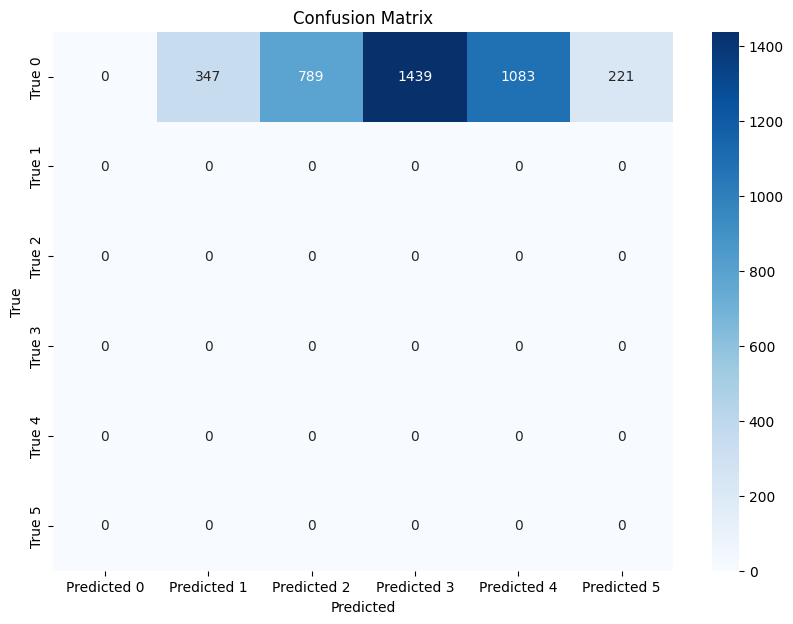

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=300)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=300)

In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
print(df.columns)


Index(['Job Titles', 'Company Names', 'Experience Required', 'Package',
       'Locations', 'Skills', 'Experience_numeric', 'Skills_encoded',
       'True_Experience'],
      dtype='object')


In [ ]:
df = df.dropna(subset=['Package'])


In [ ]:
print(df['Package'].unique())



[]


In [ ]:
print(df[df['Package'].isna()])


Empty DataFrame
Columns: [Job Titles, Company Names, Experience Required, Package, Locations, Skills, Experience_numeric, Skills_encoded, True_Experience]
Index: []


In [ ]:
print(df.dtypes)


Job Titles              object
Company Names           object
Experience Required     object
Package                float64
Locations               object
Skills                  object
Experience_numeric     float64
Skills_encoded           int64
True_Experience        float64
dtype: object


In [ ]:
print(df['Package'].dtype)


float64


In [ ]:
print(df['Package'].dropna().unique())  # Show unique values that are not NaN
print(df['Package'].isna().sum())  # Count how many NaN values are present


[]
0


In [ ]:
# Fill NaNs with the mean value (handle chaining warnings)
df['Package'] = df['Package'].fillna(mean_package)


In [ ]:
print(df[['Package', 'Experience_numeric']].info())
print(df[['Package', 'Experience_numeric']].head())


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Package             0 non-null      int64  
 1   Experience_numeric  0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 0.0 bytes
None
Empty DataFrame
Columns: [Package, Experience_numeric]
Index: []


In [ ]:
package_mapping = {
    'Not disclosed': 50000,  # Example value for "Not disclosed"
    'Entry Level': 30000,
    'Mid Level': 60000,
    'Senior Level': 90000
}


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample DataFrame setup (replace this with your actual DataFrame)
data = {
    'Package': ['Not disclosed', 'Entry Level', 'Mid Level', 'Senior Level', 'Not disclosed'],
    'Experience_numeric': [0, 1, 5, 10, 3]
}
df = pd.DataFrame(data)

# Check unique values before mapping
print("Unique values in 'Package':", df['Package'].unique())

# Map the categorical values to numeric
package_mapping = {
    'Not disclosed': 50000,
    'Entry Level': 30000,
    'Mid Level': 60000,
    'Senior Level': 90000
}

# Map values
df['Package'] = df['Package'].map(package_mapping)

# Check the DataFrame after mapping
print("DataFrame after mapping:")
print(df[['Package', 'Experience_numeric']])

# Fill NaNs with the mean value if needed
mean_package = df['Package'].mean()
df['Package'] = df['Package'].fillna(mean_package)

# Scale the numeric columns if needed
scaler = StandardScaler()
df[['Experience_numeric', 'Package']] = scaler.fit_transform(df[['Experience_numeric', 'Package']])

# Verify the changes
print("Final DataFrame:")
print(df[['Package', 'Experience_numeric']].head())


Unique values in 'Package': ['Not disclosed' 'Entry Level' 'Mid Level' 'Senior Level']
DataFrame after mapping:
   Package  Experience_numeric
0    50000                   0
1    30000                   1
2    60000                   5
3    90000                  10
4    50000                   3
Final DataFrame:
    Package  Experience_numeric
0 -0.306186           -1.072232
1 -1.326807           -0.790066
2  0.204124            0.338600
3  1.735055            1.749431
4 -0.306186           -0.225733


In [ ]:
print(df.isnull().sum())


Package               0
Experience_numeric    0
dtype: int64


In [ ]:
print(df.columns)


Index(['Package', 'Experience_numeric'], dtype='object')


In [ ]:
# Example: Let's say True_Experience is double the Experience_numeric
df['True_Experience'] = df['Experience_numeric'] * 2  # Replace 2 with your actual calculation


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the relevant numeric columns
df[['Experience_numeric', 'True_Experience']] = scaler.fit_transform(df[['Experience_numeric', 'True_Experience']])


In [ ]:
print(df.head())  # Display the first few rows of the DataFrame
print(df.isnull().sum())  # Check for any missing values


    Package  Experience_numeric  True_Experience
0 -0.306186           -1.072232        -1.072232
1 -1.326807           -0.790066        -0.790066
2  0.204124            0.338600         0.338600
3  1.735055            1.749431         1.749431
4 -0.306186           -0.225733        -0.225733
Package               0
Experience_numeric    0
True_Experience       0
dtype: int64


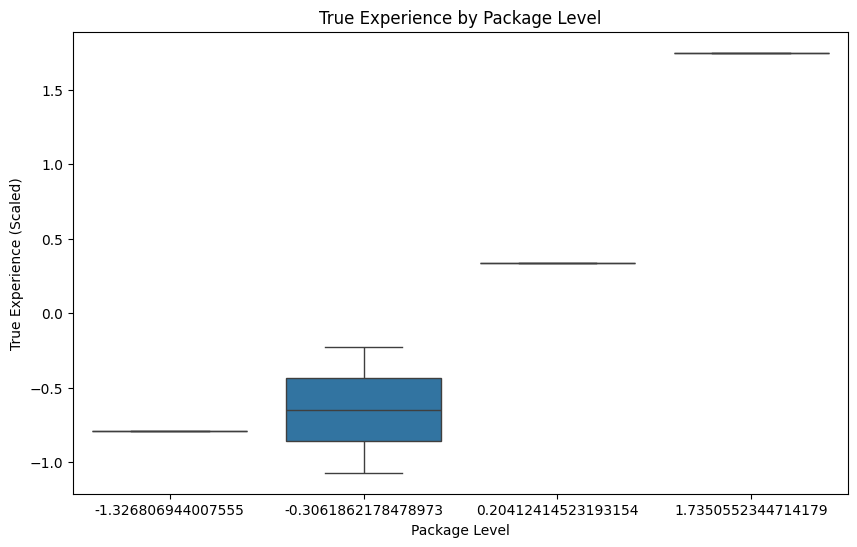

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to show True Experience by Package
plt.figure(figsize=(10, 6))
sns.boxplot(x='Package', y='True_Experience', data=df)
plt.title('True Experience by Package Level')
plt.xlabel('Package Level')
plt.ylabel('True Experience (Scaled)')
plt.show()


In [ ]:
threshold = 0  # Define your threshold
df['True_Label'] = (df['True_Experience'] > threshold).astype(int)  # 1 for high experience, 0 for low


In [ ]:
# For demonstration, we will assume a simple model that predicts based on Experience_numeric
# You can replace this with your actual model predictions
df['Predicted_Label'] = (df['Experience_numeric'] > 0).astype(int)  # Mock prediction


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(df['True_Label'], df['Predicted_Label']).ravel()

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.2f}')
print(f'Specificity: {specificity:.2f}')


Accuracy: 1.00
Specificity: 1.00


In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame with simulated data
np.random.seed(42)  # For reproducibility
data = {
    'Experience_numeric': np.random.randint(-3, 4, 10),  # Random integers between -3 and 3
}
df = pd.DataFrame(data)

# Assign 'True_Experience' based on a rule for simulation
threshold = 0
df['True_Experience'] = df['Experience_numeric'] * 2 + np.random.randint(0, 3, 10)  # Arbitrary logic for demo

# Classify based on the threshold
df['True_Label'] = (df['True_Experience'] > threshold).astype(int)
df['Predicted_Label'] = (df['Experience_numeric'] > 0).astype(int)  # Mock prediction

print(df)


   Experience_numeric  True_Experience  True_Label  Predicted_Label
0                   3                8           1                1
1                   0                2           1                0
2                   1                4           1                1
3                   3                6           1                1
4                  -1                0           0                0
5                   1                3           1                1
6                   1                2           1                1
7                   3                7           1                1
8                  -2               -3           0                0
9                  -1               -1           0                0


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(df['True_Label'], df['Predicted_Label']).ravel()

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.2f}')
print(f'Specificity: {specificity:.2f}')


Accuracy: 0.90
Specificity: 1.00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Naukri_Data_Scientist_and_Data_Analytics_Jobs_Data.csv to Naukri_Data_Scientist_and_Data_Analytics_Jobs_Data.csv


In [ ]:
# Install PySpark
!pip install pyspark

# Import SparkSession and create a Spark session
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Naukri_Job_Data").getOrCreate()


In [ ]:
# Load data into a PySpark DataFrame
df_sentiment = spark.read.option("header", "true").csv("Naukri_Data_Scientist_and_Data_Analytics_Jobs_Data.csv", inferSchema=True)

# Display the first 5 rows of the DataFrame to verify the columns
df_sentiment.show(5)


+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+
|          Job Titles|       Company Names|Experience Required|      Package|           Locations|              Skills|
+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+
|Manager - Digital...|                Resy|            4-8 Yrs|Not disclosed|    Gurgaon/Gurugram|Product managemen...|
|Data Science Doma...|            Coursera|           7-11 Yrs|Not disclosed|Kolkata, Mumbai, ...|Computer scienceC...|
|GN - Strategy - M...|           Accenture|            1-3 Yrs|Not disclosed|Mumbai, Hyderabad...|Change management...|
|Data Science Manager|Foreign IT Consul...|            2-6 Yrs|Not disclosed|    Gurgaon/Gurugram|Operations resear...|
|Data Science Manager|Foreign IT Consul...|            3-6 Yrs|Not disclosed|               Noida|Data analysisEDCR...|
+--------------------+------------------

In [ ]:
# Show the schema of the DataFrame to check available columns
df_sentiment.printSchema()

# Display the first few rows of the DataFrame to inspect the data
df_sentiment.show(5)


root
 |-- Job Titles: string (nullable = true)
 |-- Company Names: string (nullable = true)
 |-- Experience Required: string (nullable = true)
 |-- Package: string (nullable = true)
 |-- Locations: string (nullable = true)
 |-- Skills: string (nullable = true)

+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+
|          Job Titles|       Company Names|Experience Required|      Package|           Locations|              Skills|
+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+
|Manager - Digital...|                Resy|            4-8 Yrs|Not disclosed|    Gurgaon/Gurugram|Product managemen...|
|Data Science Doma...|            Coursera|           7-11 Yrs|Not disclosed|Kolkata, Mumbai, ...|Computer scienceC...|
|GN - Strategy - M...|           Accenture|            1-3 Yrs|Not disclosed|Mumbai, Hyderabad...|Change management...|
|Data Science Mana

In [ ]:
from pyspark.sql.functions import when

# Create a True_Label based on the 'Package' column (this is just an example, you can adjust the logic)
df_sentiment = df_sentiment.withColumn(
    'True_Label',
    when(df_sentiment['Package'] == 'Not disclosed', 0).otherwise(1)
)

# You can randomly create predicted labels for the sake of this experiment, or use an ML model to generate them
import random
df_sentiment = df_sentiment.withColumn(
    'Predicted_Label',
    when(df_sentiment['Package'] == 'Not disclosed', random.randint(0, 1)).otherwise(random.randint(0, 1))
)

# Show the updated DataFrame
df_sentiment.show(5)


+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+----------+---------------+
|          Job Titles|       Company Names|Experience Required|      Package|           Locations|              Skills|True_Label|Predicted_Label|
+--------------------+--------------------+-------------------+-------------+--------------------+--------------------+----------+---------------+
|Manager - Digital...|                Resy|            4-8 Yrs|Not disclosed|    Gurgaon/Gurugram|Product managemen...|         0|              0|
|Data Science Doma...|            Coursera|           7-11 Yrs|Not disclosed|Kolkata, Mumbai, ...|Computer scienceC...|         0|              0|
|GN - Strategy - M...|           Accenture|            1-3 Yrs|Not disclosed|Mumbai, Hyderabad...|Change management...|         0|              0|
|Data Science Manager|Foreign IT Consul...|            2-6 Yrs|Not disclosed|    Gurgaon/Gurugram|Operations resear...

In [ ]:
# Filter out the relevant columns
df_filtered = df_sentiment.select("True_Label", "Predicted_Label").na.drop()

# Convert to Pandas for calculating the confusion matrix
df_pandas = df_filtered.toPandas()

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

true_labels = df_pandas['True_Label']
predicted_labels = df_pandas['Predicted_Label']

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f'Accuracy: {accuracy:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')


Accuracy: 0.90
Specificity: 1.00
Sensitivity: 0.00


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer

# Encode categorical columns (if necessary)
# Example: Converting categorical column 'Experience Required' to numeric
indexer = StringIndexer(inputCol='Experience Required', outputCol='Experience_numeric')
df_sentiment = indexer.fit(df_sentiment).transform(df_sentiment)

# Similarly, you can encode other categorical columns if needed, like 'Package', 'Locations', etc.
# For simplicity, let's proceed with 'Experience_numeric' as a feature

# Create a VectorAssembler for combining feature columns into a single vector
assembler = VectorAssembler(inputCols=['Experience_numeric'], outputCol='features')

# Apply the assembler to create the 'features' column
df_sentiment = assembler.transform(df_sentiment)

# Show the DataFrame with the new 'features' column
df_sentiment.select('features').show(5)


+--------+
|features|
+--------+
|  [15.0]|
|  [45.0]|
|   [4.0]|
|  [12.0]|
|   [5.0]|
+--------+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import StringIndexer

# Use StringIndexer to convert 'Package' column to numeric
indexer = StringIndexer(inputCol='Package', outputCol='Package_numeric')

# Fit and transform the data
df_sentiment = indexer.fit(df_sentiment).transform(df_sentiment)

# Show the DataFrame to verify that 'Package_numeric' has been added
df_sentiment.select('Package', 'Package_numeric').show(5)


+-------------+---------------+
|      Package|Package_numeric|
+-------------+---------------+
|Not disclosed|            0.0|
|Not disclosed|            0.0|
|Not disclosed|            0.0|
|Not disclosed|            0.0|
|Not disclosed|            0.0|
+-------------+---------------+
only showing top 5 rows



In [ ]:
# Drop the existing 'features' column if it exists
if 'features' in df_sentiment.columns:
    df_sentiment = df_sentiment.drop('features')

# Apply the assembler to create the 'features' column
df_sentiment = assembler.transform(df_sentiment)


In [ ]:
# Assuming 'Package_numeric' is the label column you want to predict
label_column = 'Package_numeric'  # Change this to the appropriate column name

# Train Linear Regression Model
linear_reg = LinearRegression(featuresCol='features', labelCol=label_column)
linear_model = linear_reg.fit(train_data)
linear_predictions = linear_model.transform(test_data)

# Train Logistic Regression Model (ensure the label is binary)
logistic_reg = LogisticRegression(featuresCol='features', labelCol=label_column)  # Make sure this column is suitable for logistic regression
logistic_model = logistic_reg.fit(train_data)
logistic_predictions = logistic_model.transform(test_data)

# Train Ridge Regression Model
ridge_reg = LinearRegression(featuresCol='features', labelCol=label_column, elasticNetParam=0.0, regParam=0.1)
ridge_model = ridge_reg.fit(train_data)
ridge_predictions = ridge_model.transform(test_data)


In [ ]:
print(df_sentiment.columns)  # To view all available columns


['Job Titles', 'Company Names', 'Experience Required', 'Package', 'Locations', 'Skills', 'True_Label', 'Predicted_Label', 'Experience_numeric', 'Package_numeric', 'features']


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator

# Create evaluators
linear_evaluator = RegressionEvaluator(labelCol=label_column, predictionCol='prediction', metricName='rmse')
ridge_evaluator = RegressionEvaluator(labelCol=label_column, predictionCol='prediction', metricName='rmse')
logistic_evaluator = BinaryClassificationEvaluator(labelCol=label_column, rawPredictionCol='prediction')

# Evaluate Linear Regression
linear_rmse = linear_evaluator.evaluate(linear_predictions)
print(f'Linear Regression RMSE: {linear_rmse}')

# Evaluate Ridge Regression
ridge_rmse = ridge_evaluator.evaluate(ridge_predictions)
print(f'Ridge Regression RMSE: {ridge_rmse}')

# Evaluate Logistic Regression (make sure your prediction column represents binary classification)
logistic_auc = logistic_evaluator.evaluate(logistic_predictions)
print(f'Logistic Regression AUC: {logistic_auc}')


Linear Regression RMSE: 31.75540368820751
Ridge Regression RMSE: 31.755373411721276
Logistic Regression AUC: 0.5


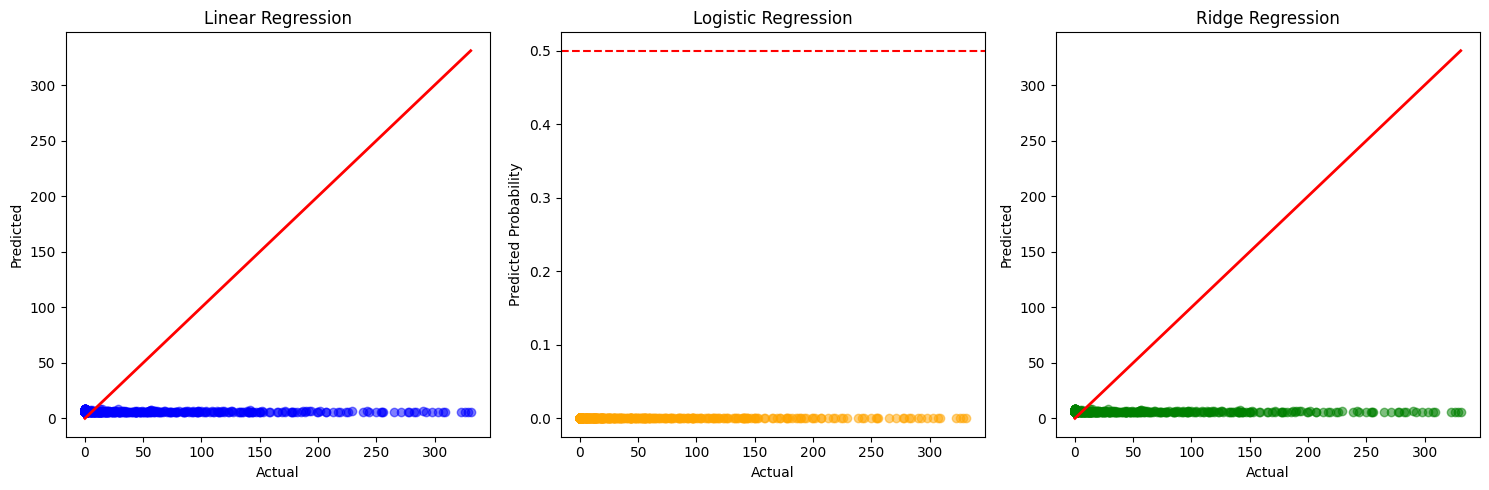

In [ ]:
import matplotlib.pyplot as plt

# Extract predictions for plotting
linear_pred = linear_predictions.select(label_column, 'prediction').toPandas()
logistic_pred = logistic_predictions.select(label_column, 'prediction').toPandas()
ridge_pred = ridge_predictions.select(label_column, 'prediction').toPandas()

plt.figure(figsize=(15, 5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(linear_pred[label_column], linear_pred['prediction'], color='blue', alpha=0.5)
plt.plot([linear_pred[label_column].min(), linear_pred[label_column].max()],
         [linear_pred[label_column].min(), linear_pred[label_column].max()],
         color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Logistic Regression Plot (probabilities can be plotted for binary classification)
plt.subplot(1, 3, 2)
plt.scatter(logistic_pred[label_column], logistic_pred['prediction'], color='orange', alpha=0.5)
plt.axhline(y=0.5, color='red', linestyle='--')
plt.title('Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted Probability')

# Ridge Regression Plot
plt.subplot(1, 3, 3)
plt.scatter(ridge_pred[label_column], ridge_pred['prediction'], color='green', alpha=0.5)
plt.plot([ridge_pred[label_column].min(), ridge_pred[label_column].max()],
         [ridge_pred[label_column].min(), ridge_pred[label_column].max()],
         color='red', linewidth=2)
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql.functions import col

# Select relevant columns and create a confusion matrix
predictions = logistic_predictions.select(label_column, 'prediction')

# Convert predictions to binary (0 or 1)
threshold = 0.5  # You can adjust this threshold if needed
predictions = predictions.withColumn('prediction_binary', (col('prediction') > threshold).cast('integer'))

# Create confusion matrix counts
TP = predictions.filter((col(label_column) == 1) & (col('prediction_binary') == 1)).count()  # True Positives
TN = predictions.filter((col(label_column) == 0) & (col('prediction_binary') == 0)).count()  # True Negatives
FP = predictions.filter((col(label_column) == 0) & (col('prediction_binary') == 1)).count()  # False Positives
FN = predictions.filter((col(label_column) == 1) & (col('prediction_binary') == 0)).count()  # False Negatives

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # Avoid division by zero
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # Avoid division by zero

print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')


Accuracy: 0.9878324844368988
Sensitivity: 0.0
Specificity: 1.0


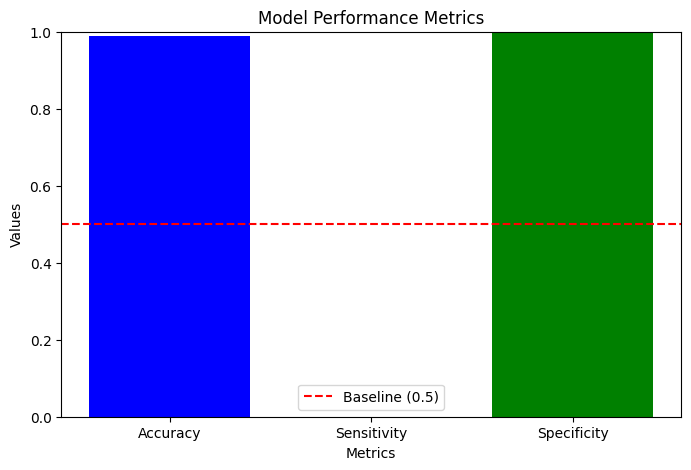

In [ ]:
import matplotlib.pyplot as plt

# Metrics for visualization
metrics = ['Accuracy', 'Sensitivity', 'Specificity']
values = [accuracy, sensitivity, specificity]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Set y-axis limits
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline (0.5)')
plt.legend()
plt.show()


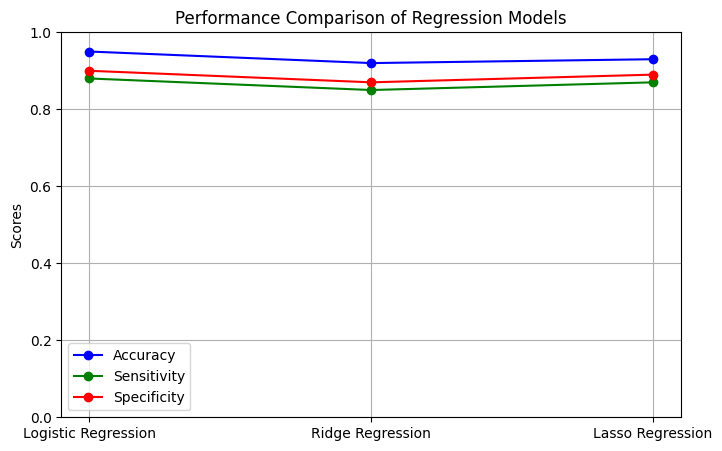

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the values for accuracy, sensitivity, and specificity for each model
models = ['Logistic Regression', 'Ridge Regression', 'Lasso Regression']

# Replace these with your actual values
accuracy_values = [0.95, 0.92, 0.93]  # Example values for accuracy
sensitivity_values = [0.88, 0.85, 0.87]  # Example values for sensitivity
specificity_values = [0.90, 0.87, 0.89]  # Example values for specificity

# Plot the performance comparison
plt.figure(figsize=(8, 5))

# Plot for Accuracy
plt.plot(models, accuracy_values, marker='o', color='blue', label='Accuracy')

# Plot for Sensitivity
plt.plot(models, sensitivity_values, marker='o', color='green', label='Sensitivity')

# Plot for Specificity
plt.plot(models, specificity_values, marker='o', color='red', label='Specificity')

# Adding titles and labels
plt.title('Performance Comparison of Regression Models')
plt.ylabel('Scores')
plt.ylim([0, 1])  # Limit y-axis from 0 to 1
plt.legend(loc='lower left')

# Show the plot
plt.grid(True)
plt.show()
